In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df["job_country"] == "United States")].copy() 
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_US.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
617281,Data Analyst,"Manager, Data Analysis and Insights","Fort Worth, TX",via Ladders,Full-time,False,"Texas, United States",2023-05-01 12:01:38,True,False,United States,year,90000.0,NaN,Fidelity Investments,"[sql, python, tableau, power bi, alteryx]","{'analyst_tools': ['tableau', 'power bi', 'alt..."
750131,Data Analyst,IT Data Analyst. Job in Tampa My Valley Jobs T...,"Tampa, FL",via My Valley Jobs Today,Full-time,False,"Florida, United States",2023-01-04 20:02:54,True,True,United States,year,60000.0,NaN,Chadwell Supply,"[sql, t-sql, crystal, sql server, ssrs, excel,...","{'analyst_tools': ['ssrs', 'excel', 'power bi'..."
730329,Data Analyst,Data Analyst,"Fresno, CA",via LinkedIn,Full-time,False,"California, United States",2023-05-24 21:00:33,False,True,United States,year,87500.0,NaN,LHH,"[python, azure, aws, power bi, excel]","{'analyst_tools': ['power bi', 'excel'], 'clou..."
104783,Data Analyst,AI Market Researcher,"San Francisco, CA",via Karkidi,Full-time,False,"California, United States",2023-02-22 00:24:33,False,False,United States,year,117500.0,NaN,Appen Limited,[go],{'programming': ['go']}
219992,Data Analyst,Data Analyst,"Tampa, FL",via BeBee,Full-time,False,"Florida, United States",2023-11-26 22:01:16,False,True,United States,year,100000.0,NaN,IntelliBridge,"[java, c++, python, r, git]","{'other': ['git'], 'programming': ['java', 'c+..."
755622,Data Analyst,Data Analyst for Betterware US,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-12-28 20:22:07,False,False,United States,year,80000.0,NaN,Pop-Up Talent,"[sql, tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
755437,Data Analyst,Data Analyst & Dashboard Developer,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-04 20:00:01,True,True,United States,year,85000.0,NaN,Impact Genome,"[tableau, terminal]","{'analyst_tools': ['tableau'], 'other': ['term..."
506314,Data Analyst,Performance Data Analyst - USDS,"Los Angeles, CA",via Ladders,Full-time,False,"California, United States",2023-11-05 11:00:33,False,False,United States,year,81311.5,NaN,TikTok,"[sql, r, express, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
523321,Data Analyst,Human Resources Data Analyst & HR,"Duluth, GA",via LinkedIn,Full-time,False,Georgia,2023-12-27 11:39:49,True,True,United States,year,72500.0,NaN,CyberCoders,"[excel, powerpoint, power bi, word]","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
405640,Data Analyst,IT Data Analyst. Job in Tampa My Valley Jobs T...,"Tampa, FL",via My Valley Jobs Today,Full-time,False,"Florida, United States",2023-01-29 16:02:43,True,True,United States,year,60000.0,NaN,Chadwell Supply,"[sql, t-sql, crystal, sql server, ssrs, excel,...","{'analyst_tools': ['ssrs', 'excel', 'power bi'..."


In [ ]:
# Only get data analyst jobs 
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


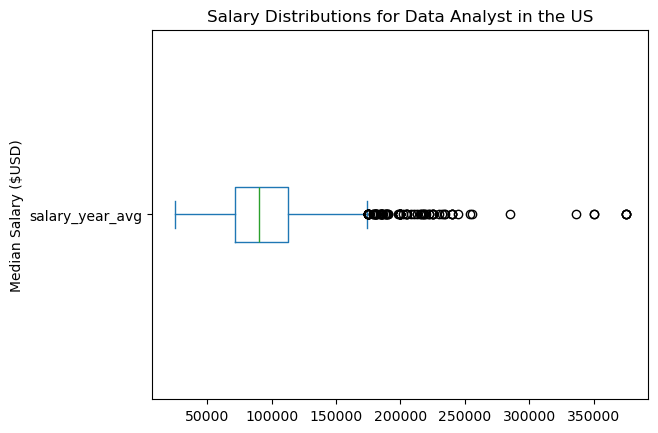

In [23]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# Alternatively, you can use matplotlib
# plt.boxplot(df_DA_US['salary_year_avg'])

plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

/var/folders/ct/0gqd6f810gb86n15wl6cctk00000gn/T/ipykernel_80471/3316539069.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False )


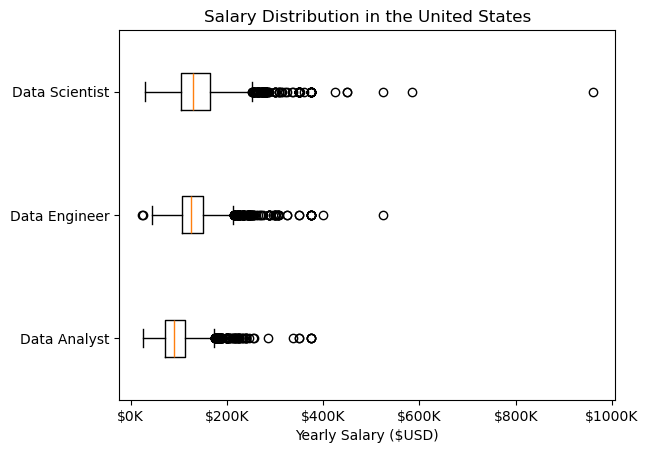

In [44]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[
    (df['job_title_short'].isin(job_titles)) &
    (df['job_country'] == 'United States')
]

df_US = df_US.dropna(subset=['salary_year_avg'])
df_US


job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
job_list[0]

plt.boxplot(job_list, labels = job_titles, vert = False )
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()